In [8]:
!pip install redis types-redis python-dotenv matplotlib flask flask-testing toml

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 KB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 KB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 KB 9.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip freeze


apturl==0.5.2
asttokens==3.0.0
bcrypt==3.2.0
blinker==1.4
Brlapi==0.8.3
certifi==2020.6.20
chardet==4.0.0
click==8.0.3
colorama==0.4.4
comm==0.2.2
command-not-found==0.3
cryptography==3.4.8
cupshelpers==1.0
dbus-python==1.2.18
debugpy==1.8.13
decorator==5.2.1
defer==1.0.6
distro==1.7.0
distro-info==1.1+ubuntu0.2
duplicity==0.8.21
exceptiongroup==1.2.2
executing==2.2.0
fasteners==0.14.1
future==0.18.2
httplib2==0.20.2
idna==3.3
importlib-metadata==4.6.4
ipykernel==6.29.5
ipython==8.34.0
jedi==0.19.2
jeepney==0.7.1
jupyter_client==8.6.3
jupyter_core==5.7.2
keyring==23.5.0
language-selector==0.1
launchpadlib==1.10.16
lazr.restfulclient==0.14.4
lazr.uri==1.0.6
lockfile==0.12.2
louis==3.20.0
macaroonbakery==1.3.1
Mako==1.1.3
MarkupSafe==2.0.1
matplotlib-inline==0.1.7
monotonic==1.6
more-itertools==8.10.0
nest-asyncio==1.6.0
netifaces==0.11.0
oauthlib==3.2.0
olefile==0.46
packaging==24.2
paramiko==2.9.3
parso==0.8.4
pexpect==4.8.0
Pillow==9.0.1
platformdirs==4.3.7
prompt_toolkit==3.0.50
prot

In [1]:
%load_ext autoreload
import sys
try:
    from utils import validate_python_code
except:
    print("It seems this file is in the wrong folder. "
          "Make sure to place it in the `programming-assignments` folder/project.",
          file=sys.stderr)

It seems this file is in the wrong folder. Make sure to place it in the `programming-assignments` folder/project.


In [2]:
%%writefile initial_file.py

import datetime
import getpass
import os
import platform
import random
from typing import Sequence
from matplotlib.figure import Figure
from matplotlib.axes import Axes

def validating_sum_of_squares(seq: Sequence[str | float | int]) -> Sequence[bool]:
    return_seq = []
    for element in seq:
        try:
            temp = False
            num = int(element)
            if num < 0:
                return_seq.append(False)
                continue
            for i in range(int(num ** 0.5) + 1):
                remainder = (num - i ** 2) ** 0.5
                if remainder.is_integer():
                    return_seq.append(True)
                    temp = True
                    break
            if temp is False:
                return_seq.append(False)
        except (ValueError, TypeError):
            return_seq.append(False)
    return return_seq

def generate_plot(single_line_fig: Figure):
    Numbers = []
    for i in range(100):
        if i < 50:
            Numbers.append(random.randint(0, 10))
        else:
            Numbers.append(random.randint(10, 20))

    axes: Axes = single_line_fig.gca()
    axes.set_title(
        f"""If you see this, your installation was successful!
        Date: {datetime.datetime.now()}
        Folder: {os.getcwd()}
        User: {getpass.getuser()}
        OS: {platform.system()}"""
    )
    axes.plot(Numbers)
    single_line_fig.tight_layout()
    return single_line_fig


Overwriting initial_file.py


In [3]:
%%writefile tests_validating_sum_of_squares_solution.py

# Make sure to run this cell before running the next one
from initial_file import validating_sum_of_squares

def tests_validating_sum_of_squares() -> None:
    test_cases = [
        (
            ["2", "x", -10, 3.3, "asd", None, "b", 4.0],
            [True, False, False, False, False, False, False, True],
        ),
        ([9, "x", -9, None], [True, False, False, False]),
    ]
    
    for _in, _out in test_cases:
        _res = validating_sum_of_squares(_in)
        assert _res == _out, (
            f"The function with input `{_in}` should return the value `{_out}` of type `{type(_out)}`\n"
            f"but returned the value `{_res}` of type `{type(_res)}`."
        )

if __name__ == "__main__":
    tests_validating_sum_of_squares()
    print("All tests passed successfully! ✅")

Overwriting tests_validating_sum_of_squares_solution.py


In [4]:
!pip install coverage


Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install pytest


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.6/343.6 KB 2.9 MB/s eta 0:00:00a 0:00:01


In [8]:
# Test cell
print("Running the tests", file=sys.stderr)
try:
    import initial_file
except ImportError:
    raise ValueError("You did not execute your solution cell!")

try:
    from initial_file import validating_sum_of_squares
except ImportError:
    raise ValueError("Your solution does not contain the right function!")

!coverage run -m pytest tests_validating_sum_of_squares_solution.py


Running the tests


============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-8.3.5, pluggy-1.5.0
rootdir: /home/arvid/Desktop/Python
collected 1 item                                                               

tests_validating_sum_of_squares_solution.py .                            [100%]

============================== 1 passed in 0.40s ===============================


In [13]:
import py_compile

# Försök att kompilera koden och kontrollera om den har rätt syntax
try:
    py_compile.compile("tests_validating_sum_of_squares_solution.py")
    print("Syntax check passed ✅")
except py_compile.PyCompileError as e:
    print(f"Syntax error: {e}")


Syntax check passed ✅


In [14]:
print("Validating Python code", file=sys.stderr)
py_compile.compile("tests_validating_sum_of_squares_solution.py")
print('tests passed', u'\u2713')

tests passed ✓


Validating Python code


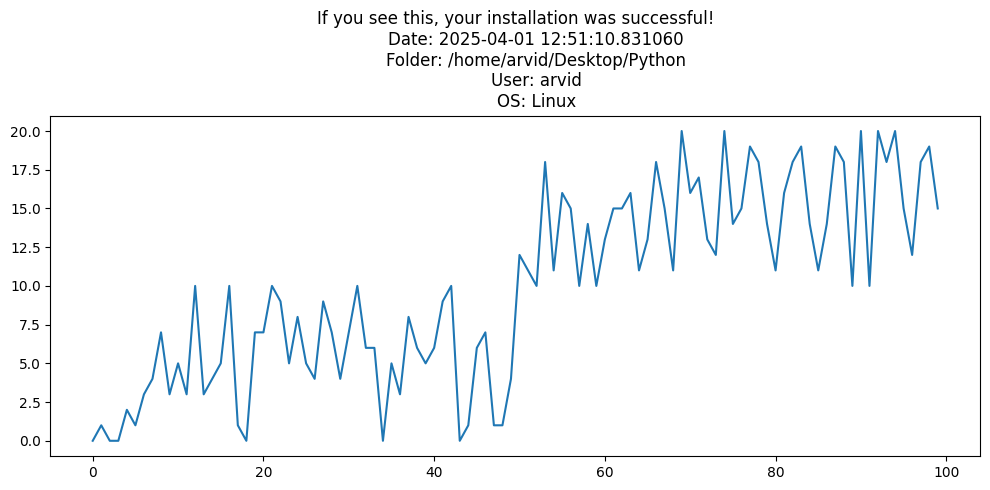

In [10]:
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as plt
from initial_file import generate_plot
fig = plt.figure(figsize=(10, 5))
fig = generate_plot(fig)
plt.show()

In [15]:
# test cell
py_compile.compile("initial_file.py")
print('tests passed', u'\u2713')

tests passed ✓
